# Exploratory Data Analysis and Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from dateutil import parser
from sklearn.model_selection import train_test_split
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

%matplotlib inline
sns.set()

In [3]:
crashes = pd.read_csv('traffic_crashes_chicago.csv')

In [4]:
# Low_memory=False, because it has mixed types of data in the same column/too many rows
people = pd.read_csv('traffic_crashes_people.csv', low_memory=False)

In [5]:
vehicles = pd.read_csv('traffic_crashes_vehicles.csv', low_memory=False)

In [6]:
def howmanyunique(data):
    tempo = []
    nombre = []
    for x in data.columns:
        tempo.append(len(data[x].value_counts().unique()))
        nombre.append(x)
    print(tempo)
    print('')
    print(nombre)

In [7]:
def howmanynan(data):
    print(data.isna().sum())   

In [8]:
def rows_w_nan(data):
   
    temp = []
    for x in data.columns:
        if data[x].isna().sum() > 0:
            percentage_of_data = data[x].isna().sum()/(list(data.shape)[0])
            print("Row: {} : is made {}% of NaN Values.".format(x, percentage_of_data.round(3)))
            if percentage_of_data > 0.3:
                temp.append(x)
    print(temp)

In [9]:
def howmanyduplicates(data):
    print(data.duplicated().sum())

In [10]:
def rows_w_nan1(data):
   
    for x in data.columns:
        print(x)

# Crashes Data Set

In [11]:
crashes.shape

(482866, 49)

In [12]:
howmanyunique(crashes)

[1, 1, 2, 21, 28, 19, 8, 12, 6, 18, 20, 22, 6, 7, 7, 3, 2, 2, 2, 2, 3, 12, 40, 40, 424, 4, 488, 254, 2, 2, 2, 2, 4, 2, 13, 5, 14, 5, 8, 14, 12, 24, 1, 24, 7, 12, 138, 138, 138]

['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',

In [13]:
howmanyduplicates(crashes)

0


In [14]:
rows_w_nan(crashes)

Row: RD_NO : is made 0.008% of NaN Values.
Row: CRASH_DATE_EST_I : is made 0.925% of NaN Values.
Row: LANE_CNT : is made 0.588% of NaN Values.
Row: REPORT_TYPE : is made 0.024% of NaN Values.
Row: INTERSECTION_RELATED_I : is made 0.774% of NaN Values.
Row: NOT_RIGHT_OF_WAY_I : is made 0.953% of NaN Values.
Row: HIT_AND_RUN_I : is made 0.706% of NaN Values.
Row: STREET_DIRECTION : is made 0.0% of NaN Values.
Row: STREET_NAME : is made 0.0% of NaN Values.
Row: BEAT_OF_OCCURRENCE : is made 0.0% of NaN Values.
Row: PHOTOS_TAKEN_I : is made 0.987% of NaN Values.
Row: STATEMENTS_TAKEN_I : is made 0.98% of NaN Values.
Row: DOORING_I : is made 0.997% of NaN Values.
Row: WORK_ZONE_I : is made 0.994% of NaN Values.
Row: WORK_ZONE_TYPE : is made 0.995% of NaN Values.
Row: WORKERS_PRESENT_I : is made 0.998% of NaN Values.
Row: MOST_SEVERE_INJURY : is made 0.002% of NaN Values.
Row: INJURIES_TOTAL : is made 0.002% of NaN Values.
Row: INJURIES_FATAL : is made 0.002% of NaN Values.
Row: INJURIES_INCA

In [15]:
# We are going to drop all the columns with a lot of of NaN values, except for location that we can say right ahead that is
# a multicolinearity case, since it has the Latiutude and Longitude together
crashes = crashes.drop(columns=['CRASH_DATE_EST_I', 'LANE_CNT', 'INTERSECTION_RELATED_I',
                                'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'PHOTOS_TAKEN_I', 
                                'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE',
                                'WORKERS_PRESENT_I', 'LOCATION'])

### Data Manipulation with Missing Values (NaN)

> **RD_NO**

So we can see here that RD_NO and REPORT_TYPE still have a lot of missing data and that can be explained by the website, where they say and I quote:


> " For privacy reasons, this column is blank for recent crashes."

So since the RD_NO is another way to connect the cases between datasets, we can easily discard the whole column, because we still have CRASH_RECORD_ID, that has no missing values

> **REPORT_TYPE**

In [16]:
crashes.REPORT_TYPE.value_counts()

NOT ON SCENE (DESK REPORT)    277606
ON SCENE                      193274
AMENDED                          240
Name: REPORT_TYPE, dtype: int64

By checking the REPORT_TYPE column we realize that it doesn't offer any predictive value to our model, but still might use it for the business understanding part.

> So we decide to drop the RD_NO columns because we have a good substitute and drop the rows where the remaining NaN values are, so we have a cleaner dataset

In [17]:
crashes = crashes.drop(columns=['RD_NO'])

In [18]:
# Now we can drop the remaining rows with NaN values
crashes.dropna(inplace=True)

In [19]:
crashes.isna().sum().sum()

0

### Since "Injuries_Fatal" is important, let's give some more attention to it

We want to transform the column into a Yes or No kind of answer instead of numbers of deads per accident.

In [20]:
crashes.INJURIES_FATAL.value_counts(dropna=False)

0.0    467170
1.0       345
2.0        19
3.0         5
Name: INJURIES_FATAL, dtype: int64

In [21]:
crashes['INJURIES_FATAL'] = np.where(crashes['INJURIES_FATAL']>0, 1, 0)

In [22]:
crashes.INJURIES_FATAL.value_counts(dropna=False)

0    467170
1       369
Name: INJURIES_FATAL, dtype: int64

## Some more data manipulation with useful columns

### WEATHER_CONDITION

In [23]:
crashes.WEATHER_CONDITION.value_counts()

CLEAR                       368594
RAIN                         41291
UNKNOWN                      20477
SNOW                         19484
CLOUDY/OVERCAST              13905
OTHER                         1510
FOG/SMOKE/HAZE                 797
SLEET/HAIL                     692
FREEZING RAIN/DRIZZLE          548
BLOWING SNOW                   153
SEVERE CROSS WIND GATE          86
BLOWING SAND, SOIL, DIRT         2
Name: WEATHER_CONDITION, dtype: int64

In [24]:
crashes.WEATHER_CONDITION = np.where(crashes.WEATHER_CONDITION=='BLOWING SNOW', 'SNOW', crashes.WEATHER_CONDITION)

In [25]:
crashes.WEATHER_CONDITION = np.where(crashes.WEATHER_CONDITION=='FREEZING RAIN/DRIZZLE', 'RAIN', crashes.WEATHER_CONDITION)

In [26]:
crashes.WEATHER_CONDITION = np.where(crashes.WEATHER_CONDITION=='FOG/SMOKE/HAZE', 'OTHER', crashes.WEATHER_CONDITION)

In [27]:
crashes.WEATHER_CONDITION = np.where(crashes.WEATHER_CONDITION=='SLEET/HAIL', 'OTHER', crashes.WEATHER_CONDITION)

In [28]:
crashes.WEATHER_CONDITION = np.where(crashes.WEATHER_CONDITION=='BLOWING SAND, SOIL, DIRT', 'OTHER', crashes.WEATHER_CONDITION)

In [29]:
crashes.WEATHER_CONDITION = np.where(crashes.WEATHER_CONDITION=='SEVERE CROSS WIND GATE', 'OTHER', crashes.WEATHER_CONDITION)

In [30]:
crashes.WEATHER_CONDITION.value_counts()

CLEAR              368594
RAIN                41839
UNKNOWN             20477
SNOW                19637
CLOUDY/OVERCAST     13905
OTHER                3087
Name: WEATHER_CONDITION, dtype: int64

### ALIGNMENT

In [31]:
crashes.ALIGNMENT.value_counts()

STRAIGHT AND LEVEL       455951
STRAIGHT ON GRADE          5759
CURVE, LEVEL               3501
STRAIGHT ON HILLCREST      1437
CURVE ON GRADE              664
CURVE ON HILLCREST          227
Name: ALIGNMENT, dtype: int64

### POSTED_SPEED_LIMIT

In [32]:
# Bining Posted_Speed_Limit
crashes.POSTED_SPEED_LIMIT.value_counts()

30    344750
35     32142
25     28387
20     18069
15     16296
10      9838
0       6609
40      4268
5       3548
45      2685
55       360
3        113
50        94
9         89
99        66
39        50
1         33
60        24
2         19
24        16
32        14
33        10
34        10
65        10
6          7
11         5
36         5
70         3
7          2
14         2
12         2
18         2
31         2
26         2
49         1
38         1
22         1
63         1
4          1
23         1
29         1
Name: POSTED_SPEED_LIMIT, dtype: int64

In [33]:
# Let's bin the speed limit in 9 groups, the last one being 45 miles/hour or above
crashes.POSTED_SPEED_LIMIT = pd.cut(crashes.POSTED_SPEED_LIMIT,[0, 5, 10, 15, 20, 25, 30, 35, 40, 45],
                                    precision=0, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8])

In [34]:
# crashes.POSTED_SPEED_LIMIT.value_counts()

In [35]:
# howmanyunique(crashes)

In [36]:
crashes.DAMAGE.value_counts()

OVER $1,500      269655
$501 - $1,500    137408
$500 OR LESS      60476
Name: DAMAGE, dtype: int64

In [37]:
crashes.CRASH_DAY_OF_WEEK.value_counts()

6    75975
7    68977
3    67341
5    67141
4    66813
2    64997
1    56295
Name: CRASH_DAY_OF_WEEK, dtype: int64

In [38]:
crashes.CRASH_MONTH.value_counts()

10    45053
12    42845
9     41972
11    41620
8     40634
1     40077
2     40014
7     38888
6     36792
5     35784
3     33395
4     30465
Name: CRASH_MONTH, dtype: int64

In [39]:
crashes.CRASH_HOUR.value_counts()

16    35788
15    35637
17    35296
14    31770
18    29204
13    28926
12    27848
8     25089
11    24143
9     22048
10    21655
19    21287
7     20250
20    16826
21    14947
22    13739
23    11522
6     10530
0      9382
1      7813
2      6783
5      6369
3      5561
4      5126
Name: CRASH_HOUR, dtype: int64

In [40]:
# crashes.CRASH_HOUR = pd.cut(crashes.CRASH_HOUR,[0, 6, 12, 18, 24],
#                                     precision=0, labels=[0, 1, 2, 3])

In [41]:
crashes.CRASH_HOUR.value_counts()

16    35788
15    35637
17    35296
14    31770
18    29204
13    28926
12    27848
8     25089
11    24143
9     22048
10    21655
19    21287
7     20250
20    16826
21    14947
22    13739
23    11522
6     10530
0      9382
1      7813
2      6783
5      6369
3      5561
4      5126
Name: CRASH_HOUR, dtype: int64

In [42]:
crashes.ROADWAY_SURFACE_COND.value_counts()

DRY                347220
WET                 64424
UNKNOWN             31103
SNOW OR SLUSH       19652
ICE                  3809
OTHER                1121
SAND, MUD, DIRT       210
Name: ROADWAY_SURFACE_COND, dtype: int64

In [43]:
crashes.TRAFFICWAY_TYPE.value_counts()

NOT DIVIDED                        209149
DIVIDED - W/MEDIAN (NOT RAISED)     82824
ONE-WAY                             61863
PARKING LOT                         33176
DIVIDED - W/MEDIAN BARRIER          27706
FOUR WAY                            14558
OTHER                               13135
ALLEY                                7710
UNKNOWN                              5102
CENTER TURN LANE                     3988
T-INTERSECTION                       3092
DRIVEWAY                             1619
RAMP                                 1440
UNKNOWN INTERSECTION TYPE             904
FIVE POINT, OR MORE                   369
Y-INTERSECTION                        369
TRAFFIC ROUTE                         270
NOT REPORTED                          118
ROUNDABOUT                             94
L-INTERSECTION                         53
Name: TRAFFICWAY_TYPE, dtype: int64

In [44]:
crashes.MOST_SEVERE_INJURY.value_counts()

NO INDICATION OF INJURY     408734
NONINCAPACITATING INJURY     32585
REPORTED, NOT EVIDENT        18484
INCAPACITATING INJURY         7367
FATAL                          369
Name: MOST_SEVERE_INJURY, dtype: int64

In [45]:
crashes['MOST_SEVERE_INJURY'] = np.where(crashes['MOST_SEVERE_INJURY']=='REPORTED, NOT EVIDENT',
                                         'NONINCAPACITATING INJURY', crashes['MOST_SEVERE_INJURY'])

In [46]:
crashes['MOST_SEVERE_INJURY'] = np.where(crashes['MOST_SEVERE_INJURY']=='FATAL',
                                         'INCAPACITATING INJURY', crashes['MOST_SEVERE_INJURY'])

In [47]:
crashes['MOST_SEVERE_INJURY'] = np.where(crashes['MOST_SEVERE_INJURY']=='INCAPACITATING INJURY',
                                         'INCAPACITATING INJURY/FATAL', crashes['MOST_SEVERE_INJURY'])

In [48]:
crashes.MOST_SEVERE_INJURY.value_counts()

NO INDICATION OF INJURY        408734
NONINCAPACITATING INJURY        51069
INCAPACITATING INJURY/FATAL      7736
Name: MOST_SEVERE_INJURY, dtype: int64

In [49]:
# We could check to see how long the street is OR
# We could create a kind of multi-column based on the other column "TRAFFICWAY_TYPE" OR
# Just group them together by that same column
crashes.STREET_NAME.value_counts()

WESTERN AVE          12865
PULASKI RD           11213
CICERO AVE           10233
ASHLAND AVE          10219
HALSTED ST            8955
                     ...  
NEW HAMPSHIRE AVE        1
I57 EXPY IB              1
ROCHDALE PL              1
CALDWELL                 1
LASALLE ST               1
Name: STREET_NAME, Length: 1520, dtype: int64

In [50]:
crashes.STREET_DIRECTION.value_counts()

W    166524
S    155240
N    113200
E     32575
Name: STREET_DIRECTION, dtype: int64

### Working with Date-Time Columns

- Can we explore and see if holidays play a part on accidents?

In [51]:
# CRASH_DATE is a string
crashes['CRASH_DATE'][0]

'07/10/2019 05:56:00 PM'

In [52]:
# We can check that here
type(crashes['CRASH_DATE'][0])

str

In [53]:
# We create a new column Date-Time with the previous column
crashes['DATE_ACCIDENT']= pd.to_datetime(crashes['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')

In [54]:
# We confirm that it worked
type(crashes.DATE_ACCIDENT[0])

pandas._libs.tslibs.timestamps.Timestamp

In [55]:
# Our earliest and latest date
print("Earliest Date: {} \nLatest Date: {}".format(crashes['DATE_ACCIDENT'].min(), crashes['DATE_ACCIDENT'].max()))

Earliest Date: 2013-03-03 16:48:00 
Latest Date: 2021-03-04 22:30:00


In [56]:
holidays = pd.tseries.holiday.USFederalHolidayCalendar().holidays(start='2012', end='2022').to_pydatetime()

In [57]:
holidays_date = [holiday.date() for holiday in holidays]


In [58]:
holidays_date[:3]

[datetime.date(2012, 1, 2),
 datetime.date(2012, 1, 16),
 datetime.date(2012, 2, 20)]

In [59]:
def isitaholiday(date):
    ''' super useful function'''
    if date.date() in holidays_date:
        return 1
    else: 
        return 0

In [60]:
isitaholiday(crashes['DATE_ACCIDENT'][100])

0

In [61]:
holidays[1].date()

datetime.date(2012, 1, 16)

In [62]:
crashes['IS_A_HOLIDAY'] = crashes['DATE_ACCIDENT'].apply(isitaholiday)

In [63]:
crashes['HOLIDAY_NAME'] = crashes['DATE_ACCIDENT'].apply(isitaholiday)

In [64]:
crashes['IS_A_HOLIDAY'].sum()

11062

In [65]:
crashes['DATE_ACCIDENT'][0].date()

datetime.date(2019, 7, 10)

In [66]:
crashes.drop(['CRASH_DATE'], axis = 1, inplace = True)

In [67]:
crashes.head(3)

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,DATE_ACCIDENT,IS_A_HOLIDAY,HOLIDAY_NAME
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,...,3.0,0.0,17,4,7,41.919664,-87.773288,2019-07-10 17:56:00,0,0
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,3.0,0.0,16,6,6,41.741804,-87.740954,2017-06-30 16:00:00,0,0
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,...,3.0,0.0,10,6,7,41.773456,-87.585022,2020-07-10 10:25:00,0,0


In [68]:
crashes_holiday = crashes[crashes['IS_A_HOLIDAY']==1]

In [69]:
crashes_holiday.head(3)

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,DATE_ACCIDENT,IS_A_HOLIDAY,HOLIDAY_NAME
156,3bfec94191bdc869600d2c429c45a68871eb9733ce7ec6...,25,NO CONTROLS,NO CONTROLS,SNOW,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,...,1.0,0.0,12,6,11,41.932213,-87.653694,2017-11-10 12:45:00,1,1
168,43292e98b1ba60cb4c6efeb987a67a1ec0291acea4357e...,40,NO CONTROLS,OTHER,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,WET,...,4.0,0.0,0,2,2,41.880660,-87.740728,2018-02-19 00:25:00,1,1
234,5e45d4537c4d0bd12bfa11a7f75526f4fe0d61c68a0ec1...,10,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,WET,...,1.0,0.0,2,3,1,41.879714,-87.774496,2019-01-01 02:40:00,1,1


In [70]:
crashes.isna().sum().sum()

0

In [71]:
crashes.dropna(inplace=True)

In [72]:
crashes_holiday.isna().sum().sum()

0

In [73]:
crashes_holiday.dropna(inplace=True)

<ipython-input-73-2ec4761478ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crashes_holiday.dropna(inplace=True)


### DateTime :


In [74]:
test = pd.tseries.holiday.USFederalHolidayCalendar().holidays(start='2012', end='2022', return_name=True)

In [75]:
test.keys()

DatetimeIndex(['2012-01-02', '2012-01-16', '2012-02-20', '2012-05-28',
               '2012-07-04', '2012-09-03', '2012-10-08', '2012-11-12',
               '2012-11-22', '2012-12-25',
               ...
               '2021-01-18', '2021-02-15', '2021-05-31', '2021-07-05',
               '2021-09-06', '2021-10-11', '2021-11-11', '2021-11-25',
               '2021-12-24', '2021-12-31'],
              dtype='datetime64[ns]', length=101, freq=None)

In [76]:
test.keys()[0].date()

datetime.date(2012, 1, 2)

In [77]:
aidento = []
for x in test:
    aidento.append(x)

In [78]:
aifora = []
for x in test.keys():
    aifora.append(x.date())

In [79]:
dicionarioinutil = dict(zip(aifora, aidento))

In [80]:
dates_holidays = pd.DataFrame.from_dict(dicionarioinutil, orient='index')

In [81]:
crashes_holiday['DATE_REAL'] = crashes_holiday['DATE_ACCIDENT'].apply(lambda x : x.date())

<ipython-input-81-9c13a83f2a64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crashes_holiday['DATE_REAL'] = crashes_holiday['DATE_ACCIDENT'].apply(lambda x : x.date())


### **To Delete?**
- 'FIRST_CRASH_TYPE'
- 'INJURIES_INCAPACITATING' 
- 'INJURIES_NON_INCAPACITATING'
- 'INJURIES_REPORTED_NOT_EVIDENT'
- 'INJURIES_TOTAL'
- 'MOST_SEVERE_INJURY'
- 'NUM_UNITS'
- 'BEAT_OF_OCCURRENCE'
- 'DATE_POLICE_NOTIFIED'
- 'PRIM_CONTRIBUTORY_CAUSE'
- 'SEC_CONTRIBUTORY_CAUSE'

# People Data Set

In [82]:
people.shape

(1068637, 30)

In [83]:
howmanyunique(people)

[1, 6, 45, 45, 43, 51, 11, 334, 49, 362, 3, 108, 72, 61, 19, 7, 5, 5, 186, 174, 95, 20, 14, 12, 23, 4, 8, 4, 30, 2]

['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'RD_NO', 'VEHICLE_ID', 'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE', 'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL', 'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE', 'CELL_PHONE_USE']


In [84]:
howmanyduplicates(people)

0


In [85]:
crashes.shape

(467539, 38)

In [86]:
crashes.head()

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,DATE_ACCIDENT,IS_A_HOLIDAY,HOLIDAY_NAME
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,...,3.0,0.0,17,4,7,41.919664,-87.773288,2019-07-10 17:56:00,0,0
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,3.0,0.0,16,6,6,41.741804,-87.740954,2017-06-30 16:00:00,0,0
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,...,3.0,0.0,10,6,7,41.773456,-87.585022,2020-07-10 10:25:00,0,0
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,...,3.0,0.0,1,7,7,41.802119,-87.622115,2020-07-11 01:00:00,0,0
5,00e47f189660cd8ba1e85fc63061bf1d8465184393f134...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,2.0,0.0,22,5,3,41.741804,-87.740954,2019-03-21 22:50:00,0,0


In [87]:
rows_w_nan(people)

Row: RD_NO : is made 0.007% of NaN Values.
Row: VEHICLE_ID : is made 0.02% of NaN Values.
Row: SEAT_NO : is made 0.796% of NaN Values.
Row: CITY : is made 0.261% of NaN Values.
Row: STATE : is made 0.252% of NaN Values.
Row: ZIPCODE : is made 0.325% of NaN Values.
Row: SEX : is made 0.015% of NaN Values.
Row: AGE : is made 0.285% of NaN Values.
Row: DRIVERS_LICENSE_STATE : is made 0.407% of NaN Values.
Row: DRIVERS_LICENSE_CLASS : is made 0.485% of NaN Values.
Row: SAFETY_EQUIPMENT : is made 0.003% of NaN Values.
Row: AIRBAG_DEPLOYED : is made 0.019% of NaN Values.
Row: EJECTION : is made 0.012% of NaN Values.
Row: INJURY_CLASSIFICATION : is made 0.001% of NaN Values.
Row: HOSPITAL : is made 0.818% of NaN Values.
Row: EMS_AGENCY : is made 0.884% of NaN Values.
Row: EMS_RUN_NO : is made 0.981% of NaN Values.
Row: DRIVER_ACTION : is made 0.206% of NaN Values.
Row: DRIVER_VISION : is made 0.207% of NaN Values.
Row: PHYSICAL_CONDITION : is made 0.206% of NaN Values.
Row: PEDPEDAL_ACTION : 

In [88]:
people = people.drop(columns=['CELL_PHONE_USE', 'BAC_RESULT VALUE', 'PEDPEDAL_LOCATION', 'PEDPEDAL_VISIBILITY',
                              'EMS_RUN_NO', 'EMS_AGENCY', 'HOSPITAL', 'DRIVERS_LICENSE_CLASS', 
                              'DRIVERS_LICENSE_STATE', 'ZIPCODE', 'SEAT_NO', 'PEDPEDAL_ACTION'])

In [89]:
people.dropna(inplace=True)

In [90]:
people.isna().sum()

PERSON_ID                0
PERSON_TYPE              0
CRASH_RECORD_ID          0
RD_NO                    0
VEHICLE_ID               0
CRASH_DATE               0
CITY                     0
STATE                    0
SEX                      0
AGE                      0
SAFETY_EQUIPMENT         0
AIRBAG_DEPLOYED          0
EJECTION                 0
INJURY_CLASSIFICATION    0
DRIVER_ACTION            0
DRIVER_VISION            0
PHYSICAL_CONDITION       0
BAC_RESULT               0
dtype: int64

In [91]:
people.INJURY_CLASSIFICATION.value_counts()

NO INDICATION OF INJURY     540286
NONINCAPACITATING INJURY     22844
REPORTED, NOT EVIDENT        15384
INCAPACITATING INJURY         4186
FATAL                          237
Name: INJURY_CLASSIFICATION, dtype: int64

In [92]:
people.AIRBAG_DEPLOYED.value_counts()

DID NOT DEPLOY                            425193
NOT APPLICABLE                             90946
DEPLOYMENT UNKNOWN                         26890
DEPLOYED, FRONT                            22216
DEPLOYED, COMBINATION                      12202
DEPLOYED, SIDE                              5204
DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)       286
Name: AIRBAG_DEPLOYED, dtype: int64

In [93]:
# Useless?
people.EJECTION.value_counts()

NONE                  571878
UNKNOWN                 8361
TOTALLY EJECTED         1786
PARTIALLY EJECTED        546
TRAPPED/EXTRICATED       366
Name: EJECTION, dtype: int64

In [94]:
people.PHYSICAL_CONDITION.value_counts()

NORMAL                          497478
UNKNOWN                          73118
IMPAIRED - ALCOHOL                3469
REMOVED BY EMS                    2036
FATIGUED/ASLEEP                   2022
OTHER                             1549
EMOTIONAL                         1478
ILLNESS/FAINTED                    709
HAD BEEN DRINKING                  439
IMPAIRED - DRUGS                   398
IMPAIRED - ALCOHOL AND DRUGS       148
MEDICATED                           93
Name: PHYSICAL_CONDITION, dtype: int64

In [95]:
people.PERSON_TYPE.value_counts()

DRIVER                 582899
NON-CONTACT VEHICLE        38
Name: PERSON_TYPE, dtype: int64

# Vehicles Data Set

**SEAT_NO**
- Code for seating position of motor vehicle occupant: 1= driver, 2= center front, 3 = front passenger, 4 = second row left, 5 = second row center, 6 = second row right, 7 = enclosed passengers, 8 = exposed passengers, 9= unknown position, 10 = third row left, 11 = third row center, 12 = third row right

In [96]:
vehicles.shape

(987148, 72)

In [97]:
howmanyunique(vehicles)

[1, 17, 17, 40, 17, 9, 22, 1, 2, 147, 517, 51, 68, 17, 21, 25, 9, 28, 2, 2, 25, 2, 132, 120, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 14, 1, 33, 11, 11, 4, 40, 37, 39, 58, 2, 3, 8, 3, 3, 1, 3, 1, 3, 3, 9, 2, 3, 3, 26, 4, 40, 11, 8, 9, 6, 2, 2, 7]

['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE', 'UNIT_NO', 'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID', 'CMRC_VEH_I', 'MAKE', 'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER', 'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY', 'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I', 'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I', 'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I', 'FIRST_CONTACT_POINT', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO', 'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE', 'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO', 'HAZMAT_PRESENT_I', 'HAZMAT_REPORT

In [98]:
howmanyduplicates(vehicles)

0


In [99]:
rows_w_nan(vehicles)

Row: RD_NO : is made 0.007% of NaN Values.
Row: UNIT_TYPE : is made 0.002% of NaN Values.
Row: NUM_PASSENGERS : is made 0.85% of NaN Values.
Row: VEHICLE_ID : is made 0.023% of NaN Values.
Row: CMRC_VEH_I : is made 0.981% of NaN Values.
Row: MAKE : is made 0.023% of NaN Values.
Row: MODEL : is made 0.023% of NaN Values.
Row: LIC_PLATE_STATE : is made 0.106% of NaN Values.
Row: VEHICLE_YEAR : is made 0.181% of NaN Values.
Row: VEHICLE_DEFECT : is made 0.023% of NaN Values.
Row: VEHICLE_TYPE : is made 0.023% of NaN Values.
Row: VEHICLE_USE : is made 0.023% of NaN Values.
Row: TRAVEL_DIRECTION : is made 0.023% of NaN Values.
Row: MANEUVER : is made 0.023% of NaN Values.
Row: TOWED_I : is made 0.887% of NaN Values.
Row: FIRE_I : is made 0.999% of NaN Values.
Row: OCCUPANT_CNT : is made 0.023% of NaN Values.
Row: EXCEED_SPEED_LIMIT_I : is made 0.998% of NaN Values.
Row: TOWED_BY : is made 0.918% of NaN Values.
Row: TOWED_TO : is made 0.948% of NaN Values.
Row: AREA_00_I : is made 0.961% of 

In [100]:
vehicles = vehicles.drop(columns=['NUM_PASSENGERS', 'CMRC_VEH_I', 'TOWED_I', 'FIRE_I', 'EXCEED_SPEED_LIMIT_I', 
                                  'TOWED_BY', 'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I', 
                                  'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I', 'AREA_09_I', 
                                  'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 
                                  'ILCC_NO', 'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE', 'CARRIER_CITY',
                                  'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO', 'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I',
                                  'HAZMAT_REPORT_NO', 'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
                                  'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I', 'TRAILER1_WIDTH',
                                  'TRAILER2_WIDTH', 'TRAILER1_LENGTH', 'TRAILER2_LENGTH', 'TOTAL_VEHICLE_LENGTH',
                                  'AXLE_CNT', 'VEHICLE_CONFIG', 'CARGO_BODY_TYPE', 'LOAD_TYPE', 'HAZMAT_OUT_OF_SERVICE_I',
                                  'MCS_OUT_OF_SERVICE_I', 'HAZMAT_CLASS', 'LIC_PLATE_STATE'])

In [101]:
vehicles.dropna(inplace=True)

In [102]:
vehicles.isna().sum()

CRASH_UNIT_ID          0
CRASH_RECORD_ID        0
RD_NO                  0
CRASH_DATE             0
UNIT_NO                0
UNIT_TYPE              0
VEHICLE_ID             0
MAKE                   0
MODEL                  0
VEHICLE_YEAR           0
VEHICLE_DEFECT         0
VEHICLE_TYPE           0
VEHICLE_USE            0
TRAVEL_DIRECTION       0
MANEUVER               0
OCCUPANT_CNT           0
FIRST_CONTACT_POINT    0
dtype: int64

### Done Treating the Data

In [103]:
def columns_repeat(data, data1, data2):
    data_columns = []
    data1_columns = []
    data2_columns = []
    data_data1 = []
    data_data2 = []
    data_data3 = []
    for x in data.columns:
        data_columns.append(x)
    for y in data1.columns:
        data1_columns.append(y)
    for z in data2.columns:
        data2_columns.append(z)
     
    for a in data_columns:
        if a in data1_columns:
            data_data1.append(a)
            
    for b in data_columns:
        if b in data2_columns:
            data_data2.append(b)
    
    for c in data1_columns:
        if c in data2_columns:
            data_data3.append(c)
        
    return(data_data1, data_data2, data_data3)
        
        
        

In [104]:
columns_repeat(people, crashes, vehicles)

(['CRASH_RECORD_ID'],
 ['CRASH_RECORD_ID', 'RD_NO', 'VEHICLE_ID', 'CRASH_DATE'],
 ['CRASH_RECORD_ID'])

In [105]:
# Since we only want ONE columns to be repeated, we drop the others that repeat
vehicles = vehicles.drop(columns=['RD_NO', 'VEHICLE_ID', 'CRASH_DATE'])

In [106]:
people.shape

(582937, 18)

In [107]:
crashes.shape

(467539, 38)

In [108]:
vehicles.shape

(796760, 14)

In [109]:
# Join the 3 datasets together
inner_merged_total = pd.merge(vehicles, crashes, on=['CRASH_RECORD_ID'])
inner_merged_total.shape

(765967, 51)

In [110]:
inner_merged_total.shape

(765967, 51)

In [111]:
inner_merged_total = pd.merge(inner_merged_total, people, on=['CRASH_RECORD_ID'])

In [112]:
inner_merged_total.shape

(1050234, 68)

In [113]:
inner_merged_total.isna().sum().sum()

0

In [114]:
inner_merged_total.duplicated().sum()

0

In [115]:
inner_merged_total.columns

Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'UNIT_NO', 'UNIT_TYPE', 'MAKE',
       'MODEL', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE',
       'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER', 'OCCUPANT_CNT',
       'FIRST_CONTACT_POINT', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE',
       'DAMAGE', 'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE',
       'DATE_ACCID

# Notes:

In [116]:
#plt.style.use('ggplot')

1) Chicago Car Crashes (Links to an external site.)
Note this links also to Vehicle Data (Links to an external site.) and to Driver/Passenger Data (Links to an external site.).

Build a classifier to predict the primary contributory cause of a car accident, given information about the car,
the people in the car,the road conditions etc. You might imagine your audience as a Vehicle Safety Board who's
interested in reducing traffic accidents, or as the City of Chicago who's interested in becoming aware of any
interesting patterns. Note that there is a multi-class classification problem. You will almost certainly want to bin 
or trim or otherwise limit the number of target categories on which you ultimately predict. Note e.g. that some
primary contributory causes have very few samples.

This criterion is linked to a Learning OutcomeBusiness Understanding

Explains the project's real-world value for a specific stakeholder

This criterion is linked to a Learning OutcomeData Understanding

Explicitly relates data's source and properties to real-world problem

This criterion is linked to a Learning OutcomeData Preparation

Data preparation is reproducible and well-documented with valid justifications

Modeling

Model development is iterative and documented with valid justifications

This criterion is linked to a Learning OutcomeClassification Results

Explains how well the project solves the real-world problem

This criterion is linked to a Learning OutcomeVisualization

Includes three polished visualizations of relevant findings

GitHub Repository

Repository uses all "best practices" for README, structure, and commits

Presentation Content

Presentation clearly shows stakeholders how well the project meets their needs

This criterion is linked to a Learning OutcomeSlide Style

Slides have a fully professional style

This criterion is linked to a Learning OutcomePresentation Delivery

Presentation engagingly and clearly delivers the intended content

This criterion is linked to a Learning OutcomeAnswers to Questions

Answers are fully clear and appropriate

# Modeling

In [117]:
crashes.MOST_SEVERE_INJURY.value_counts()

NO INDICATION OF INJURY        408734
NONINCAPACITATING INJURY        51069
INCAPACITATING INJURY/FATAL      7736
Name: MOST_SEVERE_INJURY, dtype: int64

In [118]:
crashes.head()

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,DATE_ACCIDENT,IS_A_HOLIDAY,HOLIDAY_NAME
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,...,3.0,0.0,17,4,7,41.919664,-87.773288,2019-07-10 17:56:00,0,0
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,3.0,0.0,16,6,6,41.741804,-87.740954,2017-06-30 16:00:00,0,0
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,...,3.0,0.0,10,6,7,41.773456,-87.585022,2020-07-10 10:25:00,0,0
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,...,3.0,0.0,1,7,7,41.802119,-87.622115,2020-07-11 01:00:00,0,0
5,00e47f189660cd8ba1e85fc63061bf1d8465184393f134...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,2.0,0.0,22,5,3,41.741804,-87.740954,2019-03-21 22:50:00,0,0


In [119]:
crashes.columns

Index(['CRASH_RECORD_ID', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE',
       'DAMAGE', 'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE',
       'DATE_ACCIDENT', 'IS_A_HOLIDAY', 'HOLIDAY_NAME'],
      dtype='object')

In [120]:
X_model_features = ['IS_A_HOLIDAY', 'STREET_NO', 'DAMAGE', 'ROADWAY_SURFACE_COND', 'POSTED_SPEED_LIMIT', 
                    'WEATHER_CONDITION', 'LIGHTING_CONDITION']

In [121]:
X = crashes[X_model_features]

In [122]:
from sklearn.preprocessing import OneHotEncoder

In [123]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe.fit_transform(X.select_dtypes(include='object'))

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [124]:
ohe.get_feature_names()

array(['x0_$500 OR LESS', 'x0_$501 - $1,500', 'x0_OVER $1,500', 'x1_DRY',
       'x1_ICE', 'x1_OTHER', 'x1_SAND, MUD, DIRT', 'x1_SNOW OR SLUSH',
       'x1_UNKNOWN', 'x1_WET', 'x2_CLEAR', 'x2_CLOUDY/OVERCAST',
       'x2_OTHER', 'x2_RAIN', 'x2_SNOW', 'x2_UNKNOWN', 'x3_DARKNESS',
       'x3_DARKNESS, LIGHTED ROAD', 'x3_DAWN', 'x3_DAYLIGHT', 'x3_DUSK',
       'x3_UNKNOWN'], dtype=object)

In [125]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score


kf = KFold()
precision_scores = []
for trained_indices, val_indices in kf.split(X, y):
    X_t = X.iloc[trained_indices]
    X_val = X.iloc[val_indices]
    y_t = y.iloc[trained_indices]
    y_val = y.iloc[val_indices]
    ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
    X_t_cat = ohe.fit_transform(X_t.select_dtypes(include='object'))
    X_t_num = ohe.fit_transform(X_t.select_dtypes(exclude='object'))
    
    
    precision_score(average='weighted')
    
    dates_holidays crashes_holiday['DATE_REAL'] inner_merged_total = pd.merge(inner_merged_total, people, on=['CRASH_RECORD_ID'])

In [126]:
y = crashes['MOST_SEVERE_INJURY']

In [127]:
y.value_counts()

NO INDICATION OF INJURY        408734
NONINCAPACITATING INJURY        51069
INCAPACITATING INJURY/FATAL      7736
Name: MOST_SEVERE_INJURY, dtype: int64

In [128]:
dates_holidays.head(3)

,0
2012-01-02,New Years Day
2012-01-16,Martin Luther King Jr. Day
2012-02-20,Presidents Day


In [129]:
dates_holidays.index.name = 'DATE_REAL'

In [130]:
crashes_holiday.head(3)

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,DATE_ACCIDENT,IS_A_HOLIDAY,HOLIDAY_NAME,DATE_REAL
156,3bfec94191bdc869600d2c429c45a68871eb9733ce7ec6...,25,NO CONTROLS,NO CONTROLS,SNOW,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,...,0.0,12,6,11,41.932213,-87.653694,2017-11-10 12:45:00,1,1,2017-11-10
168,43292e98b1ba60cb4c6efeb987a67a1ec0291acea4357e...,40,NO CONTROLS,OTHER,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,WET,...,0.0,0,2,2,41.880660,-87.740728,2018-02-19 00:25:00,1,1,2018-02-19
234,5e45d4537c4d0bd12bfa11a7f75526f4fe0d61c68a0ec1...,10,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,WET,...,0.0,2,3,1,41.879714,-87.774496,2019-01-01 02:40:00,1,1,2019-01-01


In [131]:
final_holidays = pd.merge(dates_holidays, crashes_holiday, on=['DATE_REAL'])

In [132]:
final_holidays.head(3)

,DATE_REAL,0,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,DATE_ACCIDENT,IS_A_HOLIDAY,HOLIDAY_NAME
0,2014-11-11,Veterans Day,b15daae7f809226ff0cfc93865ddcf9ff60edcf4187dc4...,30,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,1.0,0.0,20,3,11,41.998270,-87.662997,2014-11-11 20:00:00,1,1
1,2015-09-07,Labor Day,0335e90fd6f5f3d1d54bf4113afa1fe5c283b140bfaf6b...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,ONE-WAY,...,2.0,0.0,16,2,9,41.888470,-87.629413,2015-09-07 16:45:00,1,1
2,2015-09-07,Labor Day,03f950b1dbe2177e773fca438b58da82ccfde31f9af265...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,...,1.0,0.0,14,2,9,41.682311,-87.645861,2015-09-07 14:00:00,1,1


In [133]:
df = inner_merged_total.sort_values(by=['MOST_SEVERE_INJURY'], ascending=False)

In [134]:
df['MOST_SEVERE_INJURY'].value_counts()

NO INDICATION OF INJURY        889338
NONINCAPACITATING INJURY       141291
INCAPACITATING INJURY/FATAL     19605
Name: MOST_SEVERE_INJURY, dtype: int64

In [135]:
df['MOST_SEVERE_INJURY']

525117       NONINCAPACITATING INJURY
822957       NONINCAPACITATING INJURY
822955       NONINCAPACITATING INJURY
822954       NONINCAPACITATING INJURY
822947       NONINCAPACITATING INJURY
                     ...             
447335    INCAPACITATING INJURY/FATAL
55023     INCAPACITATING INJURY/FATAL
55024     INCAPACITATING INJURY/FATAL
55025     INCAPACITATING INJURY/FATAL
767858    INCAPACITATING INJURY/FATAL
Name: MOST_SEVERE_INJURY, Length: 1050234, dtype: object

In [136]:
df.shape

(1050234, 68)

In [137]:
df = df[118131:]

In [138]:
df['MOST_SEVERE_INJURY'] = np.where(df['MOST_SEVERE_INJURY']=='NO INDICATION OF INJURY',
                                         'aNO INDICATION OF INJURY', df['MOST_SEVERE_INJURY'])

In [139]:
df['MOST_SEVERE_INJURY'].value_counts()

aNO INDICATION OF INJURY       889338
NONINCAPACITATING INJURY        23160
INCAPACITATING INJURY/FATAL     19605
Name: MOST_SEVERE_INJURY, dtype: int64

In [140]:
df = df.sort_values(by=['MOST_SEVERE_INJURY'], ascending=False)

In [141]:
df['MOST_SEVERE_INJURY']

204006       aNO INDICATION OF INJURY
13067        aNO INDICATION OF INJURY
13094        aNO INDICATION OF INJURY
13095        aNO INDICATION OF INJURY
13100        aNO INDICATION OF INJURY
                     ...             
650928    INCAPACITATING INJURY/FATAL
650926    INCAPACITATING INJURY/FATAL
650927    INCAPACITATING INJURY/FATAL
515492    INCAPACITATING INJURY/FATAL
767858    INCAPACITATING INJURY/FATAL
Name: MOST_SEVERE_INJURY, Length: 932103, dtype: object

In [142]:
df = df[845359:]

In [143]:
df['MOST_SEVERE_INJURY'].value_counts()

aNO INDICATION OF INJURY       43979
NONINCAPACITATING INJURY       23160
INCAPACITATING INJURY/FATAL    19605
Name: MOST_SEVERE_INJURY, dtype: int64

In [144]:
df['MOST_SEVERE_INJURY'] = np.where(df['MOST_SEVERE_INJURY']=='aNO INDICATION OF INJURY',
                                         'NO INDICATION OF INJURY', df['MOST_SEVERE_INJURY'])

In [145]:
df.isna().sum().sum()

0

In [146]:
df.head(3)

,CRASH_UNIT_ID,CRASH_RECORD_ID,UNIT_NO,UNIT_TYPE,MAKE,MODEL,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,...,SEX,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT
909920,762193,5fca11d7fd1370015946421aab2ea8483ad9b427c70409...,2,DRIVER,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2013.0,NONE,PASSENGER,PERSONAL,...,F,34.0,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,NORMAL,TEST NOT OFFERED
909921,762193,5fca11d7fd1370015946421aab2ea8483ad9b427c70409...,2,DRIVER,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2013.0,NONE,PASSENGER,PERSONAL,...,F,28.0,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED
909922,762199,d0f3432d9675d206c756a6aed16b7afec339e7165ddc0e...,2,DRIVER,HONDA,Odyssey (minivan),2012.0,NONE,VAN/MINI-VAN,PERSONAL,...,M,45.0,SAFETY BELT USED,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED


In [147]:
df.shape

(86744, 68)

In [148]:
df_a = df

In [149]:
def basic_info(data):
    categorical = []
    numerical = []
    for i in data.columns:
        if data[i].dtype == object:
            categorical.append(i)
        else:
            numerical.append(i)
    return categorical, numerical

In [150]:
categorical, numerical = basic_info(df_a)

Dataset shape is:  (86744, 68)
Dataset size is:  5898592
Dataset columns are:  Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'UNIT_NO', 'UNIT_TYPE', 'MAKE',
       'MODEL', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE',
       'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER', 'OCCUPANT_CNT',
       'FIRST_CONTACT_POINT', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE',
       'DAMAGE', 'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       

In [151]:
df_a2 = df_a.copy(deep = True)

In [152]:
df_a2.isnull().sum().sum()

0

In [153]:
#categorical2

In [154]:
#numerical2

In [155]:
#df2 = df[numerical2]

In [156]:
#df2 = df2.drop(columns=['DATE_ACCIDENT', 'VEHICLE_ID', 'HOLIDAY_NAME', 'LONGITUDE', 'LATITUDE', 'BEAT_OF_OCCURRENCE', 'VEHICLE_YEAR'])

In [157]:
#df2

In [158]:
#df2.hist(figsize = [20,20], bins = 50)
#plt.show()

# MODEL

In [159]:
df1 = df.drop(columns=['MOST_SEVERE_INJURY'])

In [160]:
categoricalx, numericalx = basic_info(df1)

Dataset shape is:  (86744, 67)
Dataset size is:  5811848
Dataset columns are:  Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'UNIT_NO', 'UNIT_TYPE', 'MAKE',
       'MODEL', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE',
       'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER', 'OCCUPANT_CNT',
       'FIRST_CONTACT_POINT', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE',
       'DAMAGE', 'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'INJURIES_TOTAL',
       'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', '

In [161]:
df3 = df1[categoricalx]

In [162]:
deletar = []
for x in df3.columns:
    if len(df3[x].value_counts()) > 50:
        deletar.append(x)

Unique Values: 28054 :  CRASH_RECORD_ID Column Name.
Unique Values: 5 :  UNIT_TYPE Column Name.
Unique Values: 242 :  MAKE Column Name.
Unique Values: 1124 :  MODEL Column Name.
Unique Values: 14 :  VEHICLE_DEFECT Column Name.
Unique Values: 20 :  VEHICLE_TYPE Column Name.
Unique Values: 23 :  VEHICLE_USE Column Name.
Unique Values: 9 :  TRAVEL_DIRECTION Column Name.
Unique Values: 28 :  MANEUVER Column Name.
Unique Values: 14 :  FIRST_CONTACT_POINT Column Name.
Unique Values: 19 :  TRAFFIC_CONTROL_DEVICE Column Name.
Unique Values: 8 :  DEVICE_CONDITION Column Name.
Unique Values: 6 :  WEATHER_CONDITION Column Name.
Unique Values: 6 :  LIGHTING_CONDITION Column Name.
Unique Values: 18 :  FIRST_CRASH_TYPE Column Name.
Unique Values: 20 :  TRAFFICWAY_TYPE Column Name.
Unique Values: 6 :  ALIGNMENT Column Name.
Unique Values: 7 :  ROADWAY_SURFACE_COND Column Name.
Unique Values: 7 :  ROAD_DEFECT Column Name.
Unique Values: 3 :  REPORT_TYPE Column Name.
Unique Values: 2 :  CRASH_TYPE Colu

In [163]:
deletar

['CRASH_RECORD_ID',
 'MAKE',
 'MODEL',
 'DATE_POLICE_NOTIFIED',
 'STREET_NAME',
 'PERSON_ID',
 'RD_NO',
 'CRASH_DATE',
 'CITY',
 'STATE']

In [164]:
df4 = df3.drop(columns=['CRASH_RECORD_ID',
 'MAKE',
 'MODEL',
 'DATE_POLICE_NOTIFIED',
 'STREET_NAME',
 'PERSON_ID',
 'RD_NO',
 'CRASH_DATE',
 'CITY'])

In [165]:
categoricalx, numericalx = basic_info(df4)

Dataset shape is:  (86744, 33)
Dataset size is:  2862552
Dataset columns are:  Index(['UNIT_TYPE', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE',
       'TRAVEL_DIRECTION', 'MANEUVER', 'FIRST_CONTACT_POINT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION', 'PERSON_TYPE', 'STATE',
       'SEX', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION',
       'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'BAC_RESULT'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 86744 entries, 909920 to 767858
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   UNIT_TYPE       

In [166]:
def making_new_df(data, columnlist):
    for i in columnlist:
        dummy = pd.get_dummies(data[i])
        #print(dummy)
        del dummy[dummy.columns[-1]]
        data = pd.concat([data, dummy], axis = 1)
    return data

In [167]:
df5 = making_new_df(df4, categoricalx)

In [168]:
list(df5.columns)

['UNIT_TYPE',
 'VEHICLE_DEFECT',
 'VEHICLE_TYPE',
 'VEHICLE_USE',
 'TRAVEL_DIRECTION',
 'MANEUVER',
 'FIRST_CONTACT_POINT',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'REPORT_TYPE',
 'CRASH_TYPE',
 'DAMAGE',
 'PRIM_CONTRIBUTORY_CAUSE',
 'SEC_CONTRIBUTORY_CAUSE',
 'STREET_DIRECTION',
 'PERSON_TYPE',
 'STATE',
 'SEX',
 'SAFETY_EQUIPMENT',
 'AIRBAG_DEPLOYED',
 'EJECTION',
 'INJURY_CLASSIFICATION',
 'DRIVER_ACTION',
 'DRIVER_VISION',
 'PHYSICAL_CONDITION',
 'BAC_RESULT',
 'DISABLED VEHICLE',
 'DRIVER',
 'DRIVERLESS',
 'NON-CONTACT VEHICLE',
 'BRAKES',
 'CARGO',
 'ENGINE/MOTOR',
 'FUEL SYSTEM',
 'LIGHTS',
 'NONE',
 'OTHER',
 'SIGNALS',
 'STEERING',
 'SUSPENSION',
 'TIRES',
 'UNKNOWN',
 'WHEELS',
 '3-WHEELED MOTORCYCLE (2 REAR WHEELS)',
 'ALL-TERRAIN VEHICLE (ATV)',
 'BUS OVER 15 PASS.',
 'BUS UP TO 15 PASS.',
 'FARM EQUIPMENT',
 'MOPED OR MOTORIZ

In [169]:
df_a2 = df_a2.drop(columns=['CRASH_RECORD_ID', 'MODEL', 'DATE_POLICE_NOTIFIED', 'STREET_NAME', 'PERSON_ID', 'RD_NO', 'CRASH_DATE', 'CITY', 'STATE'])

In [170]:
df_a2 = df_a2.drop(columns=['CRASH_UNIT_ID',
 'MAKE',
 'VEHICLE_YEAR',
 'STREET_NO',
 'BEAT_OF_OCCURRENCE',
 'LATITUDE',
 'LONGITUDE',
 'DATE_ACCIDENT',
 'VEHICLE_ID'])

In [171]:
categorical2 = df_a2.columns

In [172]:
df_a3 = making_new_df(df_a2, categorical2)

In [173]:
deletar = []
for x in df_a3.columns:
    print("Unique Values: {} :  {} Column Name.".format(len(df_a2[x].value_counts()), x))
    if len(df_a2[x].value_counts()) > 50:
        deletar.append(x)

Unique Values: 12 :  UNIT_NO Column Name.
Unique Values: 5 :  UNIT_TYPE Column Name.
Unique Values: 14 :  VEHICLE_DEFECT Column Name.
Unique Values: 20 :  VEHICLE_TYPE Column Name.
Unique Values: 23 :  VEHICLE_USE Column Name.
Unique Values: 9 :  TRAVEL_DIRECTION Column Name.
Unique Values: 28 :  MANEUVER Column Name.
Unique Values: 20 :  OCCUPANT_CNT Column Name.
Unique Values: 14 :  FIRST_CONTACT_POINT Column Name.
Unique Values: 22 :  POSTED_SPEED_LIMIT Column Name.
Unique Values: 19 :  TRAFFIC_CONTROL_DEVICE Column Name.
Unique Values: 8 :  DEVICE_CONDITION Column Name.
Unique Values: 6 :  WEATHER_CONDITION Column Name.
Unique Values: 6 :  LIGHTING_CONDITION Column Name.
Unique Values: 18 :  FIRST_CRASH_TYPE Column Name.
Unique Values: 20 :  TRAFFICWAY_TYPE Column Name.
Unique Values: 6 :  ALIGNMENT Column Name.
Unique Values: 7 :  ROADWAY_SURFACE_COND Column Name.
Unique Values: 7 :  ROAD_DEFECT Column Name.
Unique Values: 3 :  REPORT_TYPE Column Name.
Unique Values: 2 :  CRASH_TY

KeyError: 1

In [174]:
deletar

['AGE']

In [175]:
df_a3.head(3)

,UNIT_NO,UNIT_TYPE,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT,POSTED_SPEED_LIMIT,...,IMPAIRED - ALCOHOL,IMPAIRED - ALCOHOL AND DRUGS,IMPAIRED - DRUGS,MEDICATED,NORMAL,OTHER,REMOVED BY EMS,TEST NOT OFFERED,"TEST PERFORMED, RESULTS UNKNOWN",TEST REFUSED
909920,2,DRIVER,NONE,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,1.0,REAR-RIGHT,30,...,0,0,0,0,1,0,0,1,0,0
909921,2,DRIVER,NONE,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,1.0,REAR-RIGHT,30,...,0,0,0,0,1,0,0,1,0,0
909922,2,DRIVER,NONE,VAN/MINI-VAN,PERSONAL,E,TURNING LEFT,1.0,SIDE-RIGHT,30,...,0,0,0,0,1,0,0,1,0,0


In [176]:
df_a3.isna().sum().sum()

0

In [177]:
df_a3.duplicated().sum()

125

In [178]:
df_a3.drop_duplicates(inplace=True)

In [179]:
# ALL OVER AGAIN




In [180]:
df_a3

,UNIT_NO,UNIT_TYPE,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT,POSTED_SPEED_LIMIT,...,IMPAIRED - ALCOHOL,IMPAIRED - ALCOHOL AND DRUGS,IMPAIRED - DRUGS,MEDICATED,NORMAL,OTHER,REMOVED BY EMS,TEST NOT OFFERED,"TEST PERFORMED, RESULTS UNKNOWN",TEST REFUSED
909920,2,DRIVER,NONE,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,1.0,REAR-RIGHT,30,...,0,0,0,0,1,0,0,1,0,0
909921,2,DRIVER,NONE,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,1.0,REAR-RIGHT,30,...,0,0,0,0,1,0,0,1,0,0
909922,2,DRIVER,NONE,VAN/MINI-VAN,PERSONAL,E,TURNING LEFT,1.0,SIDE-RIGHT,30,...,0,0,0,0,1,0,0,1,0,0
909923,2,DRIVER,NONE,VAN/MINI-VAN,PERSONAL,E,TURNING LEFT,1.0,SIDE-RIGHT,30,...,0,0,0,0,1,0,0,1,0,0
971367,2,DRIVER,UNKNOWN,PASSENGER,PERSONAL,S,UNKNOWN/NA,2.0,REAR-LEFT,35,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650928,2,DRIVER,UNKNOWN,PASSENGER,PERSONAL,S,STRAIGHT AHEAD,1.0,SIDE-RIGHT,30,...,0,0,0,0,0,0,0,1,0,0
650926,1,DRIVER,UNKNOWN,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,1.0,FRONT,30,...,0,0,0,0,0,0,0,1,0,0
650927,1,DRIVER,UNKNOWN,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,1.0,FRONT,30,...,0,0,0,0,1,0,0,1,0,0
515492,1,DRIVER,UNKNOWN,PASSENGER,PERSONAL,W,TURNING LEFT,1.0,SIDE-LEFT,30,...,0,0,0,0,1,0,0,1,0,0


In [181]:
list(df_a3.dtypes)

[dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('int32'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uin

In [182]:
list(df_a3.columns)

['UNIT_NO',
 'UNIT_TYPE',
 'VEHICLE_DEFECT',
 'VEHICLE_TYPE',
 'VEHICLE_USE',
 'TRAVEL_DIRECTION',
 'MANEUVER',
 'OCCUPANT_CNT',
 'FIRST_CONTACT_POINT',
 'POSTED_SPEED_LIMIT',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'REPORT_TYPE',
 'CRASH_TYPE',
 'DAMAGE',
 'PRIM_CONTRIBUTORY_CAUSE',
 'SEC_CONTRIBUTORY_CAUSE',
 'STREET_DIRECTION',
 'NUM_UNITS',
 'MOST_SEVERE_INJURY',
 'INJURIES_TOTAL',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'INJURIES_NON_INCAPACITATING',
 'INJURIES_REPORTED_NOT_EVIDENT',
 'INJURIES_NO_INDICATION',
 'INJURIES_UNKNOWN',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH',
 'IS_A_HOLIDAY',
 'HOLIDAY_NAME',
 'PERSON_TYPE',
 'SEX',
 'AGE',
 'SAFETY_EQUIPMENT',
 'AIRBAG_DEPLOYED',
 'EJECTION',
 'INJURY_CLASSIFICATION',
 'DRIVER_ACTION',
 'DRIVER_VISION',
 'PHYSICAL_CONDITION',
 'BAC_RESULT',
 1,
 2,
 3,
 4,
 5,
 6,
 7,

In [183]:
df_a4 = df_a3.drop(columns=['UNIT_TYPE',
 'VEHICLE_DEFECT',
 'VEHICLE_TYPE',
 'VEHICLE_USE',
 'TRAVEL_DIRECTION',
 'MANEUVER', 'FIRST_CONTACT_POINT', 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'REPORT_TYPE',
 'CRASH_TYPE',
 'DAMAGE',
 'PRIM_CONTRIBUTORY_CAUSE',
 'SEC_CONTRIBUTORY_CAUSE',
 'STREET_DIRECTION', 'MOST_SEVERE_INJURY'])

In [184]:
df_a4.shape

(86619, 637)

In [185]:
list(df_a4.dtypes)

[dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int32'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dty

In [186]:
list(df_a4.columns)

['UNIT_NO',
 'OCCUPANT_CNT',
 'POSTED_SPEED_LIMIT',
 'NUM_UNITS',
 'INJURIES_TOTAL',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'INJURIES_NON_INCAPACITATING',
 'INJURIES_REPORTED_NOT_EVIDENT',
 'INJURIES_NO_INDICATION',
 'INJURIES_UNKNOWN',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH',
 'IS_A_HOLIDAY',
 'HOLIDAY_NAME',
 'PERSON_TYPE',
 'SEX',
 'AGE',
 'SAFETY_EQUIPMENT',
 'AIRBAG_DEPLOYED',
 'EJECTION',
 'INJURY_CLASSIFICATION',
 'DRIVER_ACTION',
 'DRIVER_VISION',
 'PHYSICAL_CONDITION',
 'BAC_RESULT',
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 'DISABLED VEHICLE',
 'DRIVER',
 'DRIVERLESS',
 'NON-CONTACT VEHICLE',
 'BRAKES',
 'CARGO',
 'ENGINE/MOTOR',
 'FUEL SYSTEM',
 'LIGHTS',
 'NONE',
 'OTHER',
 'SIGNALS',
 'STEERING',
 'SUSPENSION',
 'TIRES',
 'UNKNOWN',
 'WHEELS',
 '3-WHEELED MOTORCYCLE (2 REAR WHEELS)',
 'ALL-TERRAIN VEHICLE (ATV)',
 'BUS OVER 15 PASS.',
 'BUS UP TO 15 PASS.',
 'FARM EQUIPMENT',
 'MOPED OR MOTORIZED BICYCLE',
 'MOTOR DRIVEN CYCLE',
 'MOTORCYCLE (OVER

In [187]:
df['MOST_SEVERE_INJURY']

909920        NO INDICATION OF INJURY
909921        NO INDICATION OF INJURY
909922        NO INDICATION OF INJURY
909923        NO INDICATION OF INJURY
971367        NO INDICATION OF INJURY
                     ...             
650928    INCAPACITATING INJURY/FATAL
650926    INCAPACITATING INJURY/FATAL
650927    INCAPACITATING INJURY/FATAL
515492    INCAPACITATING INJURY/FATAL
767858    INCAPACITATING INJURY/FATAL
Name: MOST_SEVERE_INJURY, Length: 86744, dtype: object

In [188]:
df.shape

(86744, 68)

In [189]:
ds = df.drop(columns=['MOST_SEVERE_INJURY'])

In [190]:
ds.shape

(86744, 67)

In [191]:
def shallwedelete(data):
    deletar = []
    for x in data.columns:
        print("Unique Values: {} :  {} Column Name.".format(len(data[x].value_counts()), x))
        if len(data[x].value_counts()) > 50:
            deletar.append(x)

In [192]:
deletar = []
for x in ds.columns:
    if len(ds[x].value_counts()) > 50:
            deletar.append(x)

Unique Values: 51295 :  CRASH_UNIT_ID Column Name.
Unique Values: 28054 :  CRASH_RECORD_ID Column Name.
Unique Values: 12 :  UNIT_NO Column Name.
Unique Values: 5 :  UNIT_TYPE Column Name.
Unique Values: 242 :  MAKE Column Name.
Unique Values: 1124 :  MODEL Column Name.
Unique Values: 71 :  VEHICLE_YEAR Column Name.
Unique Values: 14 :  VEHICLE_DEFECT Column Name.
Unique Values: 20 :  VEHICLE_TYPE Column Name.
Unique Values: 23 :  VEHICLE_USE Column Name.
Unique Values: 9 :  TRAVEL_DIRECTION Column Name.
Unique Values: 28 :  MANEUVER Column Name.
Unique Values: 20 :  OCCUPANT_CNT Column Name.
Unique Values: 14 :  FIRST_CONTACT_POINT Column Name.
Unique Values: 22 :  POSTED_SPEED_LIMIT Column Name.
Unique Values: 19 :  TRAFFIC_CONTROL_DEVICE Column Name.
Unique Values: 8 :  DEVICE_CONDITION Column Name.
Unique Values: 6 :  WEATHER_CONDITION Column Name.
Unique Values: 6 :  LIGHTING_CONDITION Column Name.
Unique Values: 18 :  FIRST_CRASH_TYPE Column Name.
Unique Values: 20 :  TRAFFICWAY_

In [193]:
deletar

['CRASH_UNIT_ID',
 'CRASH_RECORD_ID',
 'MAKE',
 'MODEL',
 'VEHICLE_YEAR',
 'DATE_POLICE_NOTIFIED',
 'STREET_NO',
 'STREET_NAME',
 'BEAT_OF_OCCURRENCE',
 'LATITUDE',
 'LONGITUDE',
 'DATE_ACCIDENT',
 'PERSON_ID',
 'RD_NO',
 'VEHICLE_ID',
 'CRASH_DATE',
 'CITY',
 'STATE',
 'AGE']

In [194]:
ds1 = ds.drop(columns=['CRASH_UNIT_ID',
 'CRASH_RECORD_ID',
 'MAKE',
 'MODEL',
 'VEHICLE_YEAR',
 'DATE_POLICE_NOTIFIED',
 'STREET_NO',
 'STREET_NAME',
 'BEAT_OF_OCCURRENCE',
 'LATITUDE',
 'LONGITUDE',
 'DATE_ACCIDENT',
 'PERSON_ID',
 'RD_NO',
 'VEHICLE_ID',
 'CRASH_DATE',
 'CITY',
 'AGE'])

In [195]:
ds1.columns

Index(['UNIT_NO', 'UNIT_TYPE', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE',
       'TRAVEL_DIRECTION', 'MANEUVER', 'OCCUPANT_CNT', 'FIRST_CONTACT_POINT',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'REPORT_TYPE', 'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION', 'NUM_UNITS',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'IS_A_HOLIDAY', 'HOLIDAY_NAME',
       'PERSON_TYPE', 'STATE', 'SEX', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED',
       'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'BAC_RESULT']

In [196]:
ds1 = ds1.drop(columns=['INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN'])

In [197]:
ds1 = ds1.drop(columns=['INJURY_CLASSIFICATION'])

In [198]:
ds1.head()

,UNIT_NO,UNIT_TYPE,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT,POSTED_SPEED_LIMIT,...,PERSON_TYPE,STATE,SEX,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT
909920,2,DRIVER,NONE,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,1.0,REAR-RIGHT,30,...,DRIVER,IL,F,SAFETY BELT USED,DID NOT DEPLOY,NONE,UNKNOWN,UNKNOWN,NORMAL,TEST NOT OFFERED
909921,2,DRIVER,NONE,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,1.0,REAR-RIGHT,30,...,DRIVER,IL,F,SAFETY BELT USED,DID NOT DEPLOY,NONE,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED
909922,2,DRIVER,NONE,VAN/MINI-VAN,PERSONAL,E,TURNING LEFT,1.0,SIDE-RIGHT,30,...,DRIVER,IL,M,SAFETY BELT USED,NOT APPLICABLE,NONE,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED
909923,2,DRIVER,NONE,VAN/MINI-VAN,PERSONAL,E,TURNING LEFT,1.0,SIDE-RIGHT,30,...,DRIVER,MI,M,SAFETY BELT USED,DID NOT DEPLOY,NONE,DISREGARDED CONTROL DEVICES,NOT OBSCURED,NORMAL,TEST NOT OFFERED
971367,2,DRIVER,UNKNOWN,PASSENGER,PERSONAL,S,UNKNOWN/NA,2.0,REAR-LEFT,35,...,DRIVER,IL,M,USAGE UNKNOWN,DID NOT DEPLOY,NONE,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED


In [199]:
ds1.dtypes

UNIT_NO                      int64
UNIT_TYPE                   object
VEHICLE_DEFECT              object
VEHICLE_TYPE                object
VEHICLE_USE                 object
TRAVEL_DIRECTION            object
MANEUVER                    object
OCCUPANT_CNT               float64
FIRST_CONTACT_POINT         object
POSTED_SPEED_LIMIT           int64
TRAFFIC_CONTROL_DEVICE      object
DEVICE_CONDITION            object
WEATHER_CONDITION           object
LIGHTING_CONDITION          object
FIRST_CRASH_TYPE            object
TRAFFICWAY_TYPE             object
ALIGNMENT                   object
ROADWAY_SURFACE_COND        object
ROAD_DEFECT                 object
REPORT_TYPE                 object
CRASH_TYPE                  object
DAMAGE                      object
PRIM_CONTRIBUTORY_CAUSE     object
SEC_CONTRIBUTORY_CAUSE      object
STREET_DIRECTION            object
NUM_UNITS                    int64
CRASH_HOUR                   int64
CRASH_DAY_OF_WEEK            int64
CRASH_MONTH         

In [200]:
#'UNIT_TYPE, VEHICLE_DEFECT, VEHICLE_TYPE, VEHICLE_USE, TRAVEL_DIRECTION, MANEUVER, PERSON_TYPE, STATE, SEX, SAFETY_EQUIPMENT,


In [201]:
categoricalz, numericalz = basic_info(ds1)

Dataset shape is:  (86744, 41)
Dataset size is:  3556504
Dataset columns are:  Index(['UNIT_NO', 'UNIT_TYPE', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE',
       'TRAVEL_DIRECTION', 'MANEUVER', 'OCCUPANT_CNT', 'FIRST_CONTACT_POINT',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'REPORT_TYPE', 'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION', 'NUM_UNITS', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'IS_A_HOLIDAY', 'HOLIDAY_NAME',
       'PERSON_TYPE', 'STATE', 'SEX', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED',
       'EJECTION', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION',
       'BAC_RESULT'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 86744 entries, 909920 to 767858
Data columns (total 41 columns):
 

In [202]:
def making_new_df(data, columnlist):
    for i in columnlist:
        dummy = pd.get_dummies(data[i])
        #print(dummy)
        del dummy[dummy.columns[-1]]
        data = pd.concat([data, dummy], axis = 1)
    return data

In [203]:
ds2 = making_new_df(ds1, categoricalz)

In [204]:
ds2 = ds2.drop(categoricalz, axis = 1)

In [205]:
ds2['UNIT_NO'].value_counts(())

1     40008
2     39178
3      5502
4      1379
5       433
6       142
7        60
9        20
8        15
11        3
10        3
12        1
Name: UNIT_NO, dtype: int64

In [206]:
ds2.isna().sum().sum()

0

In [207]:
ds2.drop(['UNIT_NO'], axis=1, inplace=True)

In [208]:
dfs = df

In [209]:
dfs['MOST_SEVERE_INJURY'].value_counts()

NO INDICATION OF INJURY        43979
NONINCAPACITATING INJURY       23160
INCAPACITATING INJURY/FATAL    19605
Name: MOST_SEVERE_INJURY, dtype: int64

In [210]:
dfs['MOST_SEVERE_INJURY'] = np.where(dfs['MOST_SEVERE_INJURY']=='NONINCAPACITATING INJURY', 0, dfs['MOST_SEVERE_INJURY'])

In [211]:
dfs['MOST_SEVERE_INJURY'] = np.where(dfs['MOST_SEVERE_INJURY']=='NO INDICATION OF INJURY', 1, dfs['MOST_SEVERE_INJURY'])

In [212]:
dfs['MOST_SEVERE_INJURY'] = np.where(dfs['MOST_SEVERE_INJURY']=='INCAPACITATING INJURY/FATAL', 2, dfs['MOST_SEVERE_INJURY'])

In [213]:
Y = dfs['MOST_SEVERE_INJURY']

In [214]:
Y.value_counts()

1    43979
0    23160
2    19605
Name: MOST_SEVERE_INJURY, dtype: int64

In [215]:
Y=Y.astype('int')

In [216]:
Y.shape

(86744,)

In [217]:
X = ds2

In [218]:
X.shape

(86744, 405)

In [219]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.20, random_state=42)

In [220]:
LR = LogisticRegression(max_iter=500)

In [221]:
model_lr = LR.fit(train_x, train_y)

KeyboardInterrupt: 

In [ ]:
y_lr_predict = model_lr.predict(test_x)

In [ ]:
LR_df = pd.DataFrame(data = {"Actual": test_y, "Predicted": y_lr_predict})

In [ ]:
LR_df

In [ ]:
model_lr.score(test_x, test_y)

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
model_rfr = rfc.fit(train_x, train_y)
y_rfr_predict = model_rfr.predict(test_x)

In [ ]:
RFR_df = pd.DataFrame(data = {"Actual": test_y, "Predicted": y_rfr_predict})

In [ ]:
RFR_df

In [ ]:
model_rfr.score(test_x, test_y)

In [ ]:
precision_score(test_y, y_rfr_predict, average='weighted')

In [ ]:
f1_score(test_y, y_rfr_predict, average='weighted')

In [ ]:
recall_score(test_y, y_rfr_predict, average='weighted')

In [ ]:
# import pandas as pd
# df = pd.read_csv('traffic_crashes_chicago.csv')

# df = df.drop(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE', 'TRAFFIC_CONTROL_DEVICE',
#               'DEVICE_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 'REPORT_TYPE',
#               'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE',
#               'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NAME',
#               'BEAT_OF_OCCURRENCE', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
#               'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'MOST_SEVERE_INJURY', 'STREET_NO', 'INJURIES_FATAL',
#               'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
#               'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'LATITUDE', 'LONGITUDE',  'LOCATION', 'LANE_CNT'], axis=1)
# df['STREET_DIRECTION'].fillna(method='ffill', inplace=True)
# df['target-injuries'] = df['INJURIES_TOTAL'] > 0
# df.drop('INJURIES_TOTAL', axis=1, inplace=True)

# from sklearn import preprocessing
# lbl = preprocessing.LabelEncoder()
# df['WEATHER_CONDITION'] = lbl.fit_transform(df['WEATHER_CONDITION'].astype(str))
# df['LIGHTING_CONDITION'] = lbl.fit_transform(df['LIGHTING_CONDITION'].astype(str))
# df['ROADWAY_SURFACE_COND'] = lbl.fit_transform(df['ROADWAY_SURFACE_COND'].astype(str))
# df['ROAD_DEFECT'] = lbl.fit_transform(df['ROAD_DEFECT'].astype(str))
# df['STREET_DIRECTION'] = lbl.fit_transform(df['STREET_DIRECTION'].astype(str))

# X = df.drop('target-injuries', axis=1)
# y = df['target-injuries']

In [222]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
import xgboost as xgb

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y, test_size = 0.50, random_state=42)
D_train = xgb.DMatrix(X_train, label=Y_train)
D_test  = xgb.DMatrix(X_test, label=Y_test)

In [224]:
duplicate_columns = X_train.columns[X_train.columns.duplicated()]
duplicate_columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [225]:
!pip install bayesian-optimization

In [226]:
Y_train = Y_train.astype('int')
Y_train

961440     1
960713     1
960726     1
654934     2
1043353    0
          ..
966837     1
1032050    0
930584     2
920382     1
965305     1
Name: MOST_SEVERE_INJURY, Length: 43372, dtype: int32

In [227]:
from xgboost import XGBClassifier
classifier1 = XGBClassifier().fit(X_train, Y_train)

train_p1 = classifier1.predict(X_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, hamming_loss
print(classification_report(Y_train, train_p1))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     11616
           1       0.96      0.98      0.97     21942
           2       0.85      0.81      0.83      9814

    accuracy                           0.90     43372
   macro avg       0.88      0.88      0.88     43372
weighted avg       0.90      0.90      0.90     43372



In [228]:
sum(train_p1)

41074

In [229]:
cm = confusion_matrix(train_p1, Y_train)
acc = cm.diagonal().sum()/cm.sum()
print(acc)

0.9032094438808448


In [230]:
from bayes_opt import BayesianOptimization
import xgboost as xgb
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

In [231]:
def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate, scale_pos_weight, min_child_weight, colsample_bytree):
    params = {'max_depth'       : int(max_depth),
              'gamma'           : gamma,
              'n_estimators'    : int(n_estimators),
              'learning_rate'   : learning_rate,
              'subsample'       : 0.8,
              'eval_metric'     : 'rmse',
              'min_child_weight': min_child_weight,
              'scale_pos_weight': scale_pos_weight,
              'colsample_bytree': colsample_bytree,
              'tree_method'     : 'gpu_hist'}
    cv_result = xgb.cv(params, D_train, num_boost_round=20, nfold=5)
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [232]:
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth' : (3, 10),
                        'gamma' : (0, 2),
                        'learning_rate'    : (0,1),
                        'n_estimators'     : (100,400),
                        'scale_pos_weight' : (5,10),
                        'min_child_weight' : (1,10),
                        'colsample_bytree' : (0,1)})
xgb_bo

In [233]:
xgb_bo.maximize(n_iter=10, init_points=12, acq='ei')

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | scale_... |
-------------------------------------------------------------------------------------------------------------
[13:50:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:50:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




|  4        | -0.59     |  0.9516   |  1.496    |  0.3934   |  9.397    |  1.992    |  375.1    |  5.1      |
[13:51:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:51:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:51:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Paramete

|  8        | -0.7126   |  0.1925   |  1.66     |  0.0401   |  7.998    |  8.578    |  168.4    |  8.509    |
[13:51:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:51:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:51:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Paramete

|  12       | -0.6835   |  0.0875   |  1.511    |  0.2038   |  3.339    |  5.962    |  223.9    |  8.353    |
[13:51:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:51:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:51:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Paramete

|  16       | -0.5925   |  0.8076   |  1.419    |  0.4893   |  9.233    |  2.338    |  374.6    |  5.833    |
[13:51:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:51:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:51:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Paramete

|  20       | -0.6129   |  0.7305   |  1.47     |  0.2576   |  6.927    |  2.611    |  373.6    |  5.66     |
[13:51:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:51:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:51:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Paramete

In [234]:
params = xgb_bo.max['params']
print(params)

{'colsample_bytree': 0.9515858766134149, 'gamma': 1.4962369253992516, 'learning_rate': 0.3934106906416157, 'max_depth': 9.396941351753284, 'min_child_weight': 1.9915119739488192, 'n_estimators': 375.14597386089144, 'scale_pos_weight': 5.099559590484562}


In [235]:
params['max_depth']= int(params['max_depth'])
params['n_estimators']= int(params['n_estimators'])

In [236]:
from xgboost import XGBClassifier

In [237]:
classifier2 = XGBClassifier(**params).fit(X_train, Y_train)

[13:51:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [238]:
train_p2 = classifier2.predict(X_train)

In [239]:
print(classification_report(train_p2, Y_train))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11648
           1       1.00      0.99      0.99     22069
           2       0.96      0.97      0.96      9655

    accuracy                           0.98     43372
   macro avg       0.97      0.98      0.98     43372
weighted avg       0.98      0.98      0.98     43372



In [240]:
cm = confusion_matrix(train_p2, Y_train)
acc = cm.diagonal().sum()/cm.sum()
print(acc)

0.9809093424329061


In [241]:
sum(train_p2)

41379

In [243]:
# # xgb_model=xgb.fit(x,y)
# xgb_fea_imp=pd.DataFrame(list(classifier2.get_booster().get_fscore().items()),
# columns=['feature','importance']).sort_values('importance', ascending=False)
# print('',xgb_fea_imp)
# xgb_fea_imp.to_csv('xgb_fea_imp.csv')


# from xgboost import plot_importance
# plot_importance(classifier2, )

# listy=dict(classifier2.get_booster().get_score(importance_type = 'gain'))
# listy
# dict(sorted(listy.items(), key=lambda item: item[1]))

listy=classifier2.get_booster().feature_names
listy=(X.columns)
listp=classifier2.get_booster().get_score(importance_type = 'gain')


counter = 0
listy
for k,v in listp.items():
    listp[k] = [v, listy[counter]]
    counter += 1
listp

{'f204': [671.0504068398501, 'OCCUPANT_CNT'],
 'f5': [13.941269648226033, 'POSTED_SPEED_LIMIT'],
 'f105': [8.6331628046125, 'NUM_UNITS'],
 'f107': [9.839533251712117, 'CRASH_HOUR'],
 'f172': [6.584146709674245, 'CRASH_DAY_OF_WEEK'],
 'f112': [8.908373378569234, 'CRASH_MONTH'],
 'f109': [7.267270926684999, 'IS_A_HOLIDAY'],
 'f261': [3.4288946819380963, 'HOLIDAY_NAME'],
 'f203': [12.649137715215499, 'DISABLED VEHICLE'],
 'f237': [4.046580530573769, 'DRIVER'],
 'f2': [3.893653945135077, 'DRIVERLESS'],
 'f177': [2.8857878501851846, 'NON-CONTACT VEHICLE'],
 'f212': [2.334481651817073, 'BRAKES'],
 'f4': [2.879144708996157, 'CARGO'],
 'f1': [2.422462475398297, 'ENGINE/MOTOR'],
 'f48': [1.5266381599809522, 'FUEL SYSTEM'],
 'f356': [7.293231540378378, 'LIGHTS'],
 'f86': [1.239715133631579, 'NONE'],
 'f191': [2.5990219713947367, 'OTHER'],
 'f59': [1.9736712270123455, 'SIGNALS'],
 'f159': [4.434401860087292, 'STEERING'],
 'f145': [2.6516303114337587, 'SUSPENSION'],
 'f169': [2.6262723654646467, '

<AxesSubplot:>

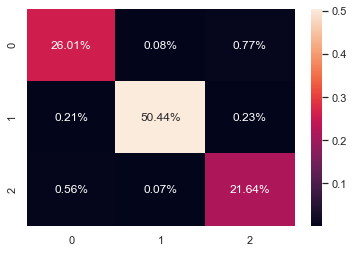

In [244]:
import seaborn as sns
cf = confusion_matrix(train_p2, Y_train)
sns.heatmap(cf/np.sum(cf), annot=True, fmt='.2%')

<AxesSubplot:>

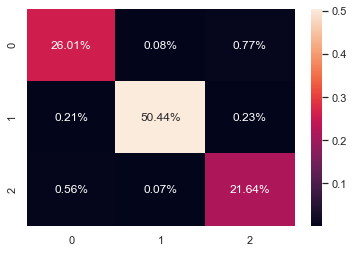

In [245]:
import seaborn as sns
cf = confusion_matrix(train_p2, Y_train)
sns.heatmap(cf/np.sum(cf), annot=True, fmt='.2%')

In [ ]:
classifier3 = XGBClassifier(**params).fit(X_train, Y_train)

[13:55:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [ ]:
train_p3 = classifier3.predict(X_test)

In [ ]:
print(classification_report(train_p3, Y_test))

In [ ]:
cm = confusion_matrix(train_p3, Y_test)
acc = cm.diagonal().sum()/cm.sum()
print(acc)

In [ ]:
sum(train_p3)

In [ ]:
cf = confusion_matrix(train_p3, Y_test)
sns.heatmap(cf/np.sum(cf), annot=True, fmt='.2%')

In [ ]:
cf = confusion_matrix(train_p3, Y_test)
sns.heatmap(cf/np.sum(cf), annot=True, fmt='.2%')